##     **Customer Churn Prediction Using ANN - Classification Problem**

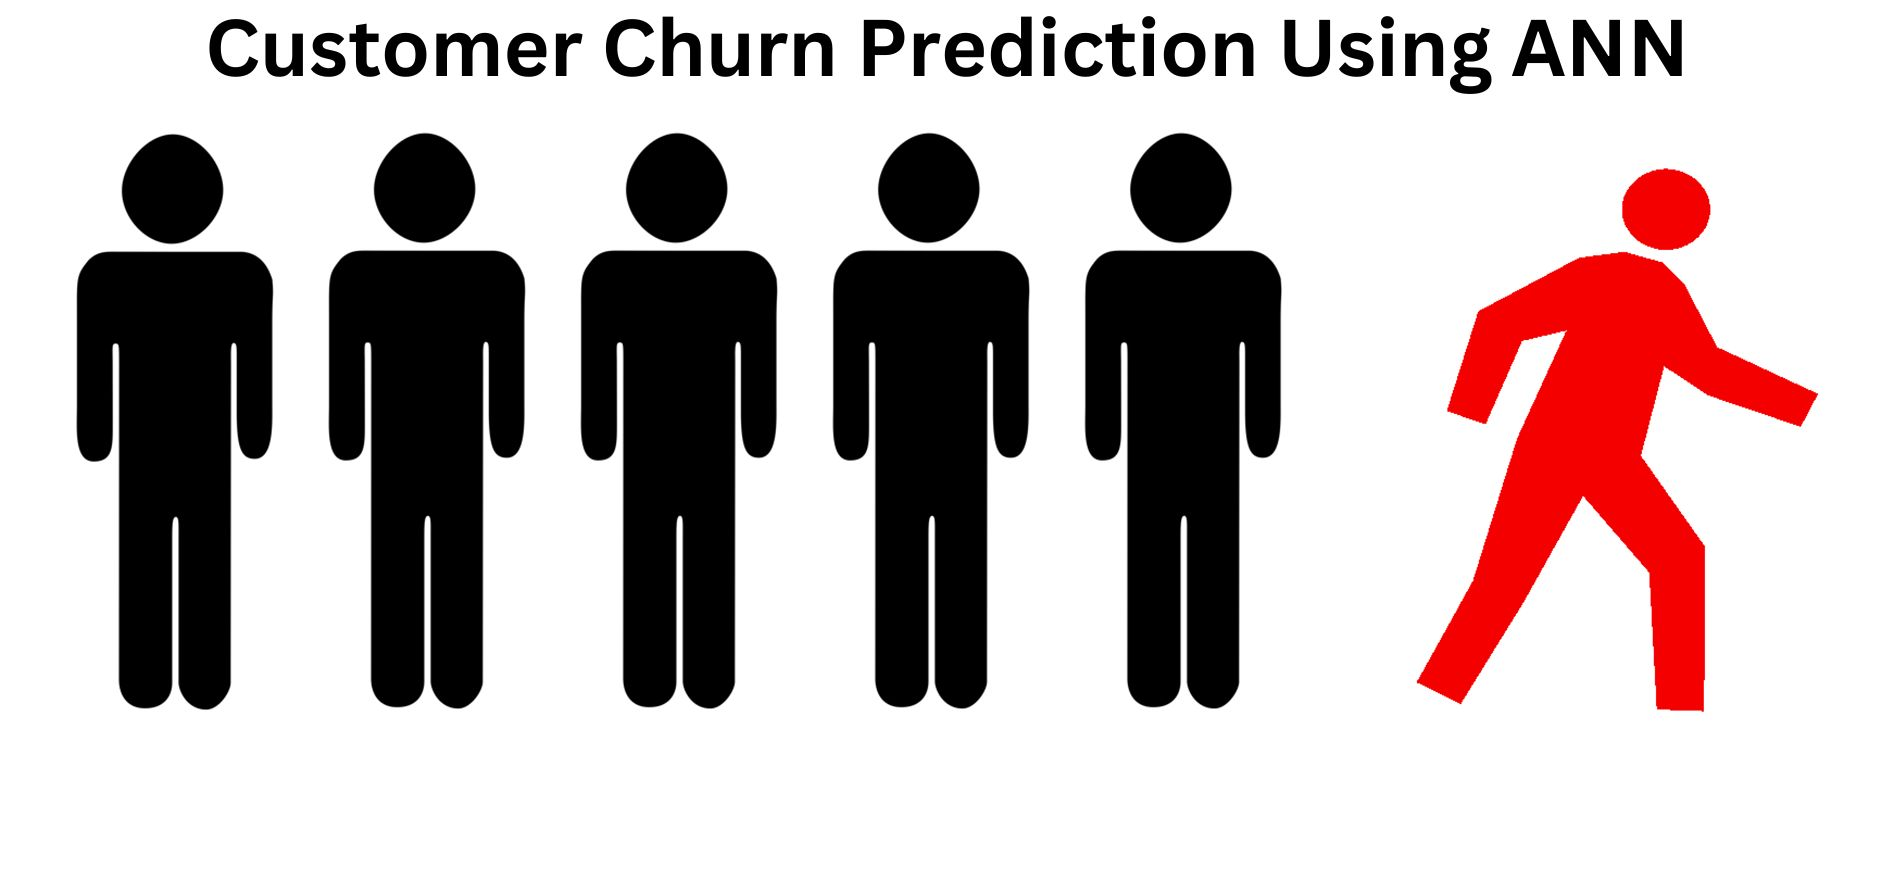

# **Import the Libraries**

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **Data Analysis & Visualization**

In [272]:
# read the dataset
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

# see the first five rows of df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [273]:
# see the shape of df
df.shape

(10000, 14)

In [274]:
# see the information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [275]:
# see the descriptive statistics of df
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [276]:
# see the duplicates values in dataset if exist then remove otherwise not.
df.duplicated().sum()

0

In [277]:
# check the null values in the each columns of dataset if exist then remove otherwise not.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [278]:
# drop the irrelevant columns 
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace = True)

In [279]:
# check again the first five rows of df after drop the irrelevant columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [280]:
# check the value counts of "Geography" column.
df_geography = df['Geography'].value_counts()
df_geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

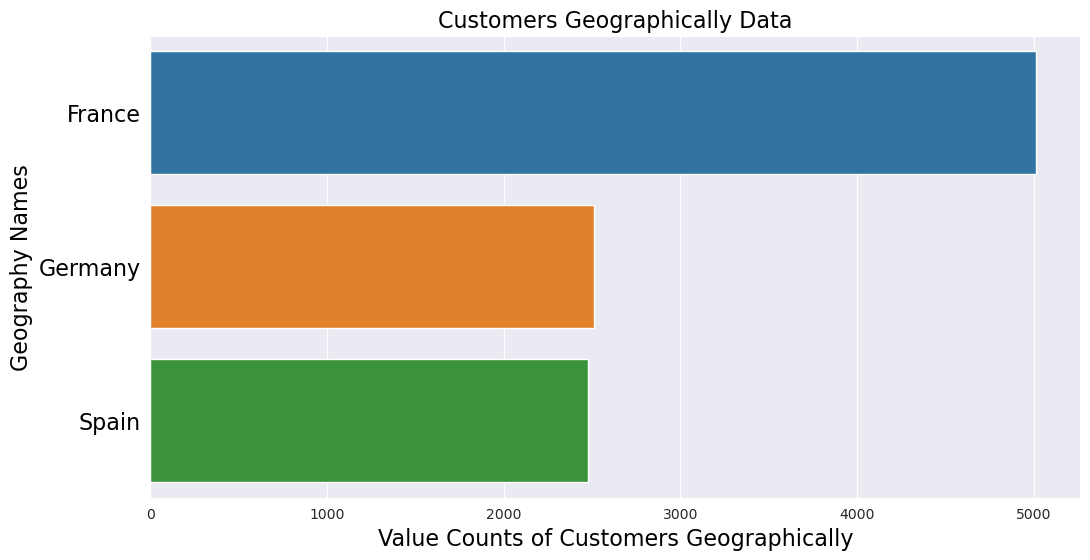

In [281]:
# let's perform univarient eda on "Geography" column. 
plt.figure(figsize=(12,6))
res=sns.barplot(x=df_geography, y=df_geography.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Customers Geographically',fontsize = 16, color='black')
plt.ylabel('Geography Names',fontsize = 16, color='black')
plt.title('Customers Geographically Data',fontsize = 16, color='black')
plt.show()

In [282]:
# check the value counts of "Gender" column.
df_gender = df['Gender'].value_counts()
df_gender

Male      5457
Female    4543
Name: Gender, dtype: int64

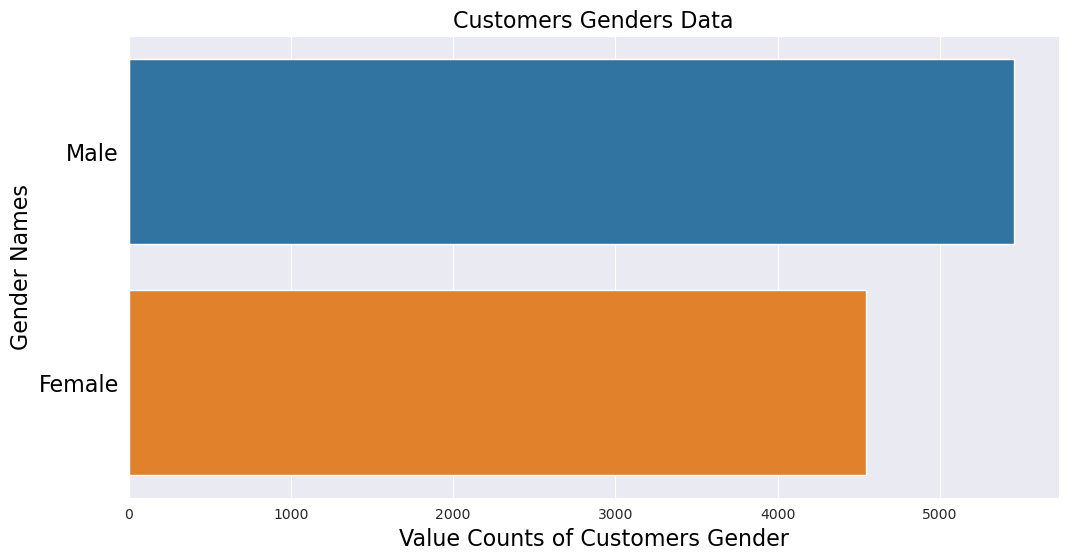

In [283]:
# let's perform univarient eda on "Gender" column. 
plt.figure(figsize=(12,6))
res=sns.barplot(x=df_gender, y=df_gender.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Customers Gender',fontsize = 16, color='black')
plt.ylabel('Gender Names',fontsize = 16, color='black')
plt.title('Customers Genders Data',fontsize = 16, color='black')
plt.show()

In [284]:
# check the value counts of "number of products" column.
df_nop = df['NumOfProducts'].value_counts()
df_nop

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

/tmp/ipykernel_32/1830261993.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


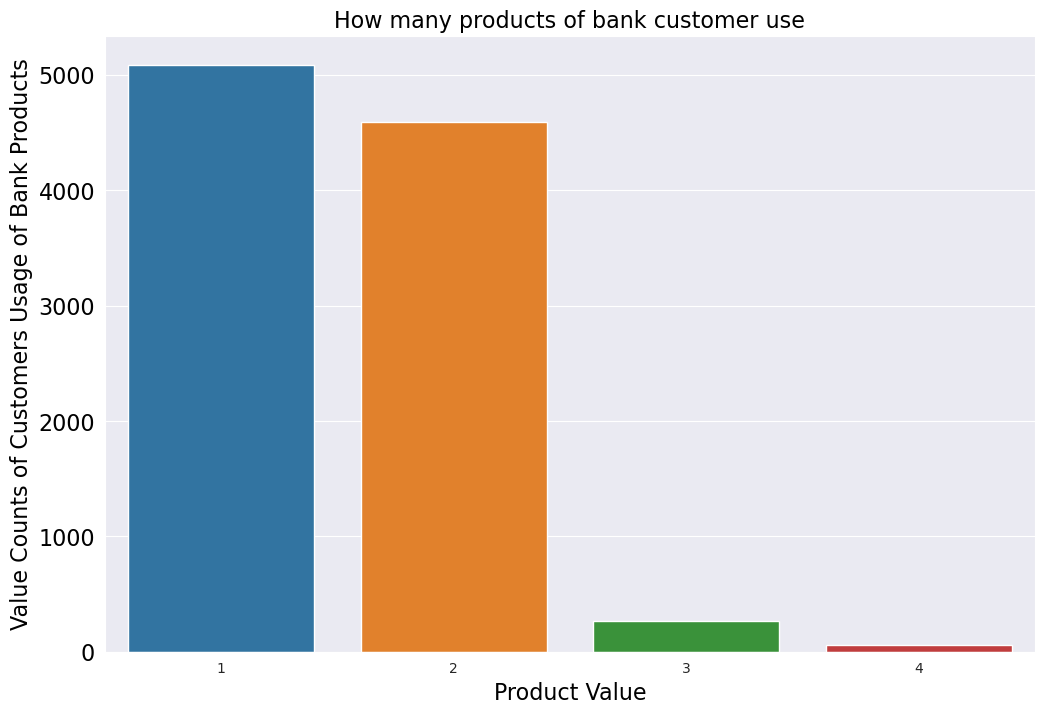

In [285]:
# let's perform univarient eda on "number of products" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_nop, x=df_nop.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customers Usage of Bank Products',fontsize = 16, color='black')
plt.xlabel('Product Value',fontsize = 16, color='black')
plt.title('How many products of bank customer use',fontsize = 16, color='black')
plt.show()

In [286]:
# check the value counts of "HasCrCard" column.
df_crc = df['HasCrCard'].value_counts()
df_crc

1    7055
0    2945
Name: HasCrCard, dtype: int64

/tmp/ipykernel_32/486259482.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


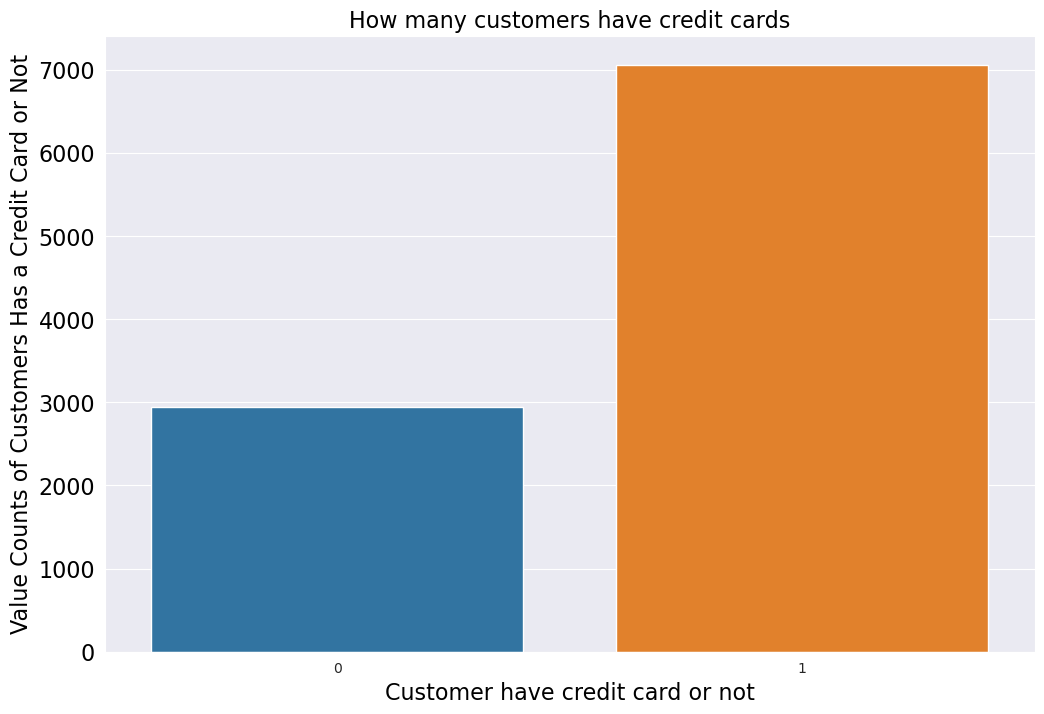

In [287]:
# let's perform univarient eda on "HasCrCard" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_crc, x=df_crc.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customers Has a Credit Card or Not',fontsize = 16, color='black')
plt.xlabel('Customer have credit card or not',fontsize = 16, color='black')
plt.title('How many customers have credit cards',fontsize = 16, color='black')
plt.show()

In [288]:
# check the value counts of "IsActiveMember" column.
df_iam = df['IsActiveMember'].value_counts()
df_iam

1    5151
0    4849
Name: IsActiveMember, dtype: int64

/tmp/ipykernel_32/2775840329.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


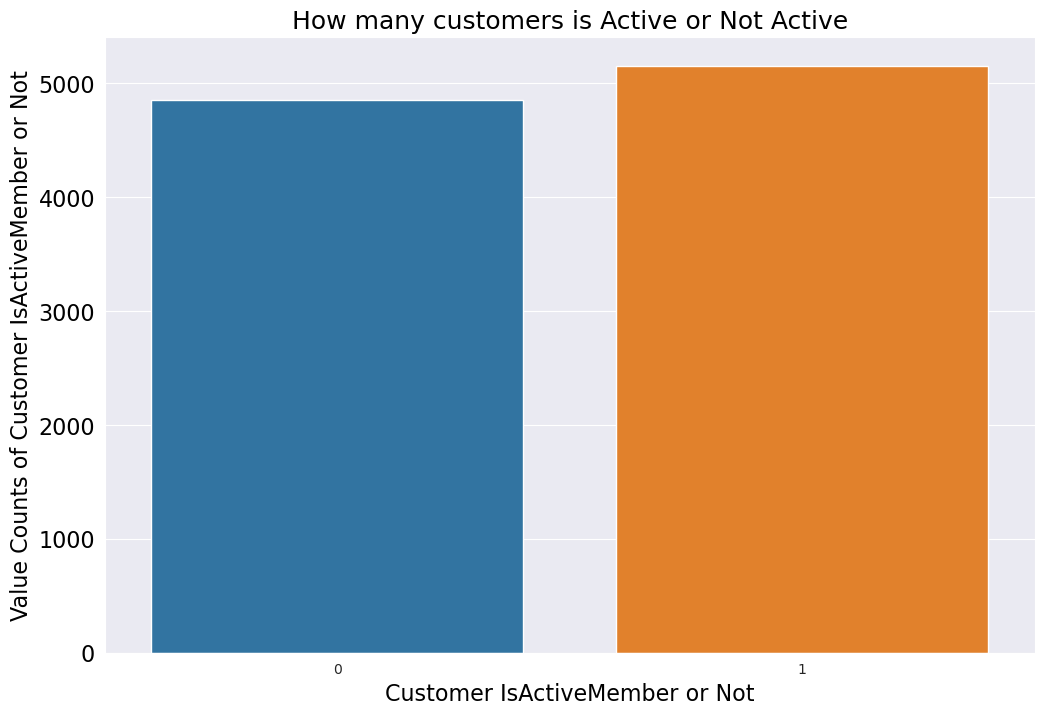

In [289]:
# let's perform univarient eda on "IsActiveMember" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_iam, x=df_iam.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer IsActiveMember or Not',fontsize = 16, color='black')
plt.xlabel('Customer IsActiveMember or Not',fontsize = 16, color='black')
plt.title('How many customers is Active or Not Active',fontsize = 18, color='black')
plt.show()

In [290]:
# check the value counts of "Exited" target column.
df_exit = df['Exited'].value_counts()
df_exit

0    7963
1    2037
Name: Exited, dtype: int64

/tmp/ipykernel_32/460548639.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


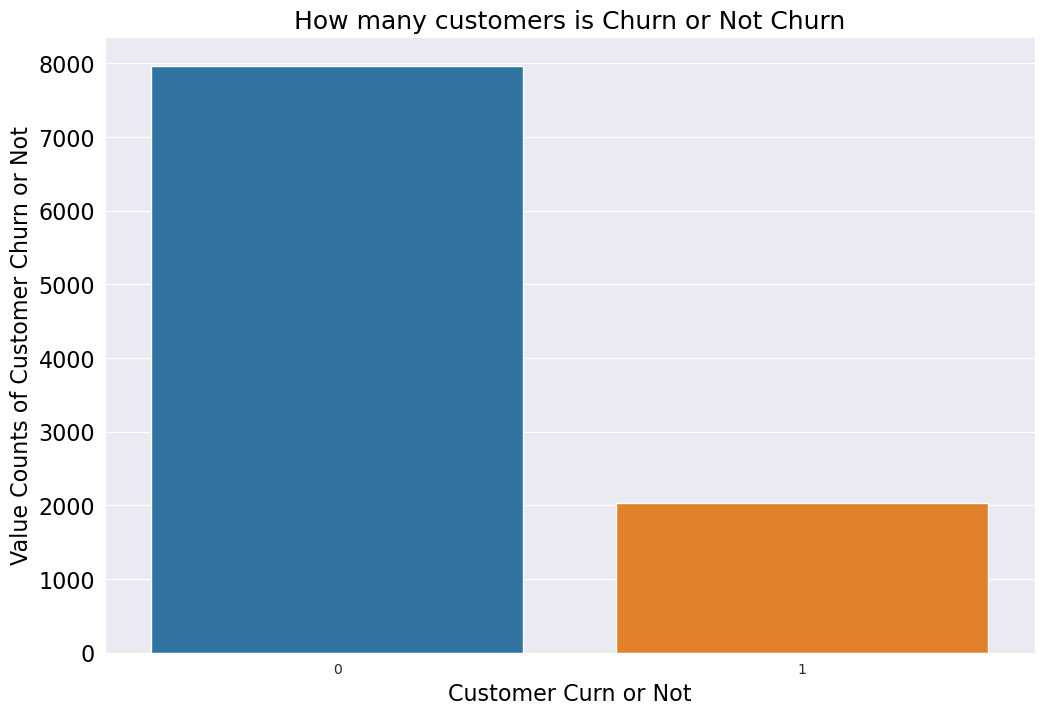

In [291]:
# # let's perform univarient eda on "Exited" target column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_exit, x=df_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer Churn or Not',fontsize = 16, color='black')
plt.xlabel('Customer Curn or Not',fontsize = 16, color='black')
plt.title('How many customers is Churn or Not Churn',fontsize = 18, color='black')
plt.show()

# **Apply One Hot Encoding Technique on Gender & Geography Column**

In [292]:
# use pandas dummies funtion for one hot encodeing 
df = pd.get_dummies(df, columns=["Gender", "Geography"], drop_first=True)

In [293]:
# check again the df after one hot encoding method apply
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# **Let's Handle the Imbalanced Target Column and Balanced it**

In [294]:
# Separate majority and minority classes
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]

# Upsample the minority class
upsampled_minority = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number of majority class samples
                              random_state=42)  # Set random state for reproducibility

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([majority_class, upsampled_minority])

In [295]:
# check the target_balanced_data
balanced_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5701,625,49,4,128504.76,1,1,0,126812.63,1,0,1,0
9337,466,47,5,102085.72,1,1,1,183536.24,1,0,1,0
4345,720,46,3,97042.60,1,1,1,133516.51,1,1,1,0
1085,803,42,5,0.00,1,1,0,196466.83,1,1,0,0


In [296]:
# see the duplicates values after the balancing the data and in dataset if exist then remove otherwise not.
df.duplicated().sum()

0

In [297]:
# check the null values after the balancing the data and in the each columns of dataset if exist then remove otherwise not.
df.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Gender_Male          0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [298]:
# check again the value counts of "Exited" target column after the balancing the data.
df_exit = balanced_data['Exited'].value_counts()
df_exit

0    7963
1    7963
Name: Exited, dtype: int64

/tmp/ipykernel_32/244396859.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


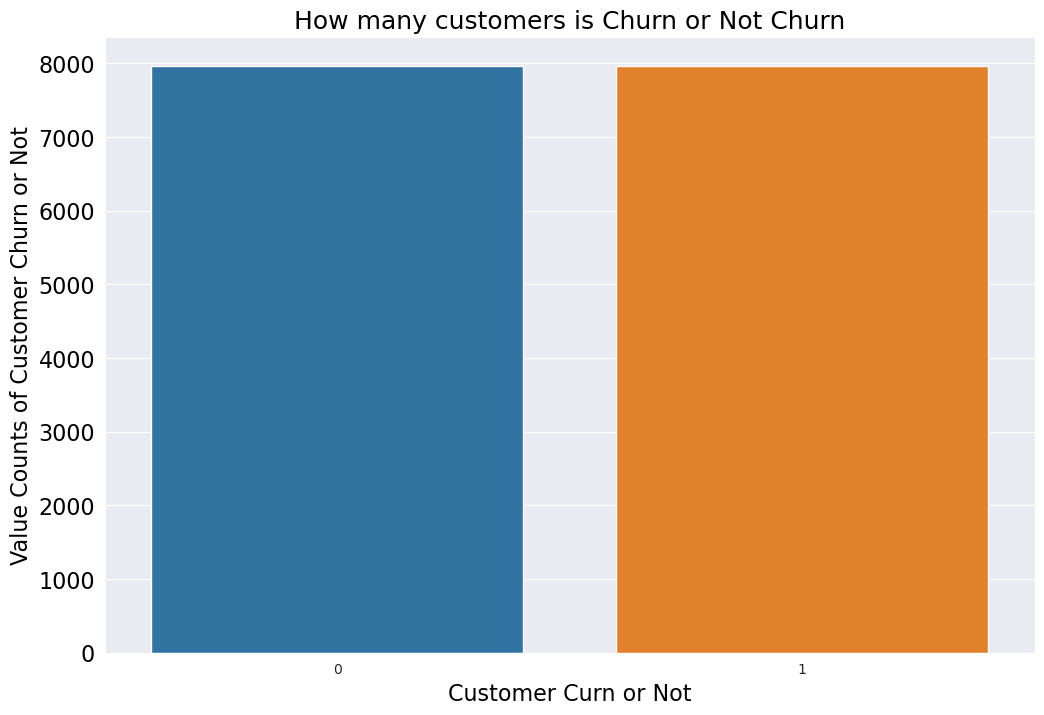

In [299]:
# # let's perform univarient eda on "Exited" target column after the balancing the data.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_exit, x=df_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer Churn or Not',fontsize = 16, color='black')
plt.xlabel('Customer Curn or Not',fontsize = 16, color='black')
plt.title('How many customers is Churn or Not Churn',fontsize = 18, color='black')
plt.show()

# **Split the Data for model Training and Testing**

In [300]:
# # split the feature in x variable and target varible in y variable
y = balanced_data['Exited']
X = balanced_data.drop('Exited',axis=1)

In [301]:
# use sklearn for train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [302]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (12740, 11)
X_test Shape :  (3186, 11)
y_train Shape :  (12740,)
y_test Shape :  (3186,)


### **Apply Sklearn Standard Scaler Technique for Standarized the Input Features Values**

In [303]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [304]:
# check the X_train_scaled values
X_train_scaled

array([[ 1.74458075e+00,  2.64948525e-01,  1.02260197e+00, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01],
       [ 1.24130320e+00,  7.61019204e-02,  8.82175645e-04, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01],
       [ 8.06835512e-02, -1.83213817e-02,  1.02260197e+00, ...,
         9.74118179e-01,  1.50360032e+00, -5.47359263e-01],
       ...,
       [ 3.16915869e-01, -8.68131101e-01,  8.82175645e-04, ...,
        -1.02656949e+00, -6.65070356e-01, -5.47359263e-01],
       [ 4.60709454e-01, -4.90437892e-01, -3.39691089e-01, ...,
        -1.02656949e+00, -6.65070356e-01, -5.47359263e-01],
       [-2.68529441e-01, -1.12744684e-01,  1.70374850e+00, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01]])

In [305]:
# check the X_est_scaled values
X_test_scaled

array([[ 0.46070945,  0.45379513, -1.02083762, ...,  0.97411818,
        -0.66507036,  1.82695364],
       [-1.34698133, -0.39601459,  1.02260197, ..., -1.02656949,
        -0.66507036, -0.54735926],
       [-1.19291677, -0.39601459, -1.36141088, ...,  0.97411818,
        -0.66507036,  1.82695364],
       ...,
       [-0.11446489, -1.0569777 ,  1.02260197, ...,  0.97411818,
         1.50360032, -0.54735926],
       [-1.0799361 , -0.7737078 ,  1.02260197, ...,  0.97411818,
         1.50360032, -0.54735926],
       [-2.4665171 , -0.39601459, -1.36141088, ...,  0.97411818,
        -0.66507036,  1.82695364]])

In [306]:
# see the shape of balanced data
balanced_data.shape

(15926, 12)

# **Model Building - Artificial - Neural - Network - ANN**

In [307]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [308]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 11)                132       
                                                                 
 dense_24 (Dense)            (None, 11)                132       
                                                                 
 dense_25 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [309]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [310]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
319/319 [==============================] - 2s 3ms/step - loss: 0.6467 - accuracy: 0.6262 - val_loss: 0.5926 - val_accuracy: 0.6919
Epoch 2/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5775 - accuracy: 0.7002 - val_loss: 0.5646 - val_accuracy: 0.7084
Epoch 3/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5567 - accuracy: 0.7178 - val_loss: 0.5521 - val_accuracy: 0.7206
Epoch 4/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5443 - accuracy: 0.7270 - val_loss: 0.5431 - val_accuracy: 0.7245
Epoch 5/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5326 - accuracy: 0.7333 - val_loss: 0.5306 - val_accuracy: 0.7335
Epoch 6/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5181 - accuracy: 0.7413 - val_loss: 0.5139 - val_accuracy: 0.7504
Epoch 7/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5012 - accuracy: 0.7522 - val_loss: 0.4943 - val_accuracy: 0.7641

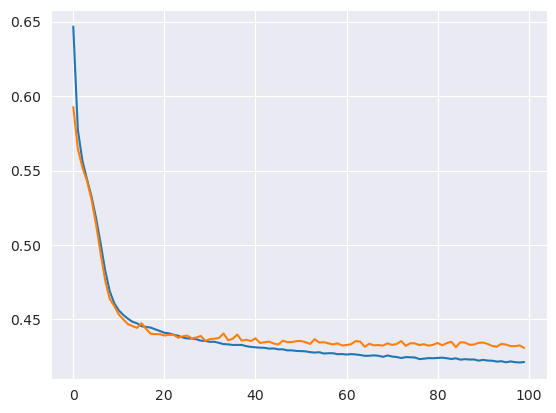

In [311]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

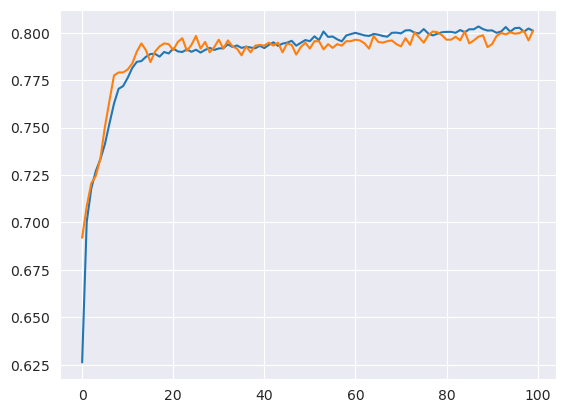

In [312]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [313]:
model.layers[0].get_weights()

[array([[-0.10201345,  0.11872724, -0.07847767, -0.09109466, -0.46591192,
         -0.10180074,  0.10640852,  0.10139217, -0.13362291, -0.19570972,
          0.09390064],
        [ 0.38394102, -0.4846889 , -1.3887753 ,  0.41697854,  0.12760283,
         -0.13531144,  0.8577602 ,  0.713047  , -0.2147323 ,  1.0970696 ,
         -0.02211042],
        [ 0.04969088, -0.0494001 ,  0.8075619 ,  0.0814485 , -0.08088166,
          0.27736488,  0.22790301, -0.22253592,  0.04899781,  0.5036135 ,
          0.37375233],
        [-0.66963357,  0.8633519 , -0.40654162,  0.43317303,  1.0289388 ,
         -0.02168987,  0.21435806,  0.8769267 , -0.41485757, -0.4367572 ,
          0.3973406 ],
        [-1.1501572 ,  0.4120847 , -0.271092  ,  1.4091312 , -0.5366275 ,
         -0.2386276 ,  0.41479102,  0.13208556,  0.64330626,  0.3367896 ,
         -0.74793905],
        [ 0.03172721, -0.11470977, -0.06123108, -0.18832052, -0.7844384 ,
         -0.7965704 , -0.30701703,  0.017745  ,  0.0542063 , -0.2672587

In [314]:
model.layers[1].get_weights()

[array([[ 0.00689591,  1.1257077 , -0.5413109 , -0.2927448 ,  0.01477732,
          0.15863313,  0.23711632,  0.02267246, -0.9520078 , -0.40406904,
         -0.5947839 ],
        [-0.85119057,  0.38338086, -0.01069367, -0.17860824, -0.43559653,
         -0.21363764, -0.576814  ,  0.19815233, -0.10759269,  0.09867726,
          0.802321  ],
        [-0.6450954 ,  0.7039741 ,  0.20156579,  0.27205893,  0.3005806 ,
         -0.37163454, -0.09192469,  0.6417572 , -0.16842525,  0.66654223,
          0.23800655],
        [-0.21866436, -0.5333454 ,  0.75554377, -0.68161124, -1.0031068 ,
          0.9255252 ,  0.37246653, -0.35645643, -0.6396133 ,  0.20584582,
          0.17705715],
        [ 0.36746654, -0.16850097, -0.64524513, -0.39244437, -0.0691938 ,
         -0.167907  ,  0.26228145,  0.02685282, -0.65043837,  0.6173368 ,
          0.14967915],
        [-0.46263477,  0.32086572,  0.35138494, -0.02404391, -0.55731463,
          0.21976545, -0.2838572 ,  0.08536813,  0.5117814 , -0.6811917

In [315]:
y_log = model.predict(X_test_scaled)

100/100 [==============================] - 0s 1ms/step


In [316]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [317]:
accuracy_score(y_test, y_pred)

0.7944130571249215

# **Thanks for Reading my Notebook**